# Tutorial on Natural Language Processing (NLP) with IMDb Movie Reviews

## Table of Contents
1. Introduction to NLP and IMDb Dataset
2. Data Preprocessing
3. Exploratory Data Analysis (EDA)
4. Text Tokenization and Preprocessing
5. Feature Extraction using TF-IDF
6. Sentiment Analysis with Machine Learning
7. Evaluating Model Performance
8. Conclusion and Further Steps

---

## 1. Introduction to NLP and IMDb Dataset

### 1.1. What is NLP?
Natural Language Processing (NLP) is a field of artificial intelligence that focuses on the interaction between computers and human language. It involves tasks such as text understanding, translation, sentiment analysis, and more.

### 1.2. IMDb Dataset
The IMDb dataset is a popular dataset for sentiment analysis. It contains movie reviews labeled with their sentiment (positive or negative).

## 2. Data Preprocessing

### 2.1. Download and Load the Data
Download the IMDb dataset from [this link](https://ai.stanford.edu/~amaas/data/sentiment/), and extract it to a suitable location.

### 2.2. Load and Organize Data in Python


In [23]:
import os
import tarfile

# Define the file path
#file_path = 'aclImdb_v1.tar.gz'

# Extract the tar.gz file
#with tarfile.open(file_path, 'r:gz') as tar:
#    tar.extractall()

def load_data(folder):
    texts = []
    labels = []
    for label in ['pos', 'neg']:
        label_folder = os.path.join(folder, label)
        for filename in os.listdir(label_folder):
            with open(os.path.join(label_folder, filename), 'r', encoding='utf-8') as file:
                texts.append(file.read())
                labels.append(1 if label == 'pos' else 0)
    return texts, labels

train_texts, train_labels = load_data('aclImdb/train')
test_texts, test_labels = load_data('aclImdb/test')


## 3. Exploratory Data Analysis (EDA)

### 3.1. Understand the Data
Explore some basic statistics about the dataset, such as the number of samples, class distribution, and review lengths.


In [24]:
# Basic statistics
print(f'Total Training Samples: {len(train_texts)}')
print(f'Total Testing Samples: {len(test_texts)}')
print(f'Class Distribution in Training Data: {train_labels.count(1)} positive, {train_labels.count(0)} negative')

# Average review length
avg_len = sum(len(text.split()) for text in train_texts) / len(train_texts)
print(f'Average Review Length: {avg_len:.2f} words')


Total Training Samples: 25000
Total Testing Samples: 25000
Class Distribution in Training Data: 12500 positive, 12500 negative
Average Review Length: 233.79 words


## 4. Text Tokenization and Preprocessing

### 4.1. Tokenization


In [25]:
import nltk
#This command downloads the Punkt tokenizer models. 
#The Punkt tokenizer is a data-driven sentence tokenizer that can split text into sentences. 
#It's useful for tasks like sentence tokenization.
nltk.download('punkt') 
nltk.download('stopwords') #list of common stop words (the, it, is, ...)
nltk.download('wordnet') # download wordnet data for english language. It contains nouns, pronouns, verbs, etc
nltk.download('omw-1.4') # multi-lexical database of wordnet for multiple languages
# Tokenize
#Tokenization involves splitting text into individual words or tokens. It's a crucial step for any NLP task.
def tokenize_text(text): 
    return nltk.word_tokenize(text)

train_tokens = [tokenize_text(text) for text in train_texts]
test_tokens = [tokenize_text(text) for text in test_texts]


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\drwaq\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\drwaq\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\drwaq\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\drwaq\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [18]:
# Print examples
print("Training Data:")
for i in range(3):  # Print first 3 examples for brevity
    print("\n\n")
    print(f"Example {i+1}:")
    print(f"Original Text: {train_texts[i]}")
    print("")
    print(f"Tokens: {train_tokens[i]}")
    print(f"Label: {'Positive' if train_labels[i] == 1 else 'Negative'}")
    print()
print("\n\n")
print("\nTesting Data:")
for i in range(3):  # Print first 3 examples for brevity
    print(f"Example {i+1}:")
    print(f"Original Text: {test_texts[i]}")
    print(f"Tokens: {test_tokens[i]}")
    print(f"Label: {'Positive' if test_labels[i] == 1 else 'Negative'}")
    print()

Training Data:



Example 1:
Original Text: Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High's satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I'm here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn't!

Tokens: ['bromwell', 'high', 'cartoon', 'comedy', '.', 'ran', 'time', 'program', 'school', 'life', ',', '``', 'teacher', "''", '.', '35', 'year', 't

### 4.2. Stopword Removal and Lowercasing

In [5]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word.lower() for word in tokens if word.lower() not in stop_words]

train_tokens = [remove_stopwords(tokens) for tokens in train_tokens]
test_tokens = [remove_stopwords(tokens) for tokens in test_tokens]


### 4.3. Lemmatization

In [6]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer() # reduce words to their base forms: running to run etc.

def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

train_tokens = [lemmatize_tokens(tokens) for tokens in train_tokens]
test_tokens = [lemmatize_tokens(tokens) for tokens in test_tokens]

## 5. Feature Extraction using TF-IDF
Term Frequency-Inverse Document Frequency (TF-IDF) is a widely used technique in Natural Language Processing and Information Retrieval. It's used for feature extraction from text data.)

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert tokens back to text
train_texts_processed = [' '.join(tokens) for tokens in train_tokens]
test_texts_processed = [' '.join(tokens) for tokens in test_tokens]

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 5000 words
X_train_tfidf = tfidf_vectorizer.fit_transform(train_texts_processed)
X_test_tfidf = tfidf_vectorizer.transform(test_texts_processed)

After applying TF-IDF vectorization with a limit of the top 5000 words, the resulting matrices `X_train_tfidf` and `X_test_tfidf` will have the following dimensions:

- `X_train_tfidf`: Number of training samples (rows) x 5000 (columns).
- `X_test_tfidf`: Number of testing samples (rows) x 5000 (columns).

In [22]:
# Get a few sample examples
sample_train_examples = X_train_tfidf[:2]  # Print the first 3 examples
sample_test_examples = X_test_tfidf[:2]   # Print the first 3 examples
print("Shape of sample traing example: ",sample_train_examples[0].shape)
print("Shape of sample test example: ",sample_test_examples[0].shape)

# Print sample examples
print("Sample Training Examples (after TF-IDF Vectorization):")
for i, example in enumerate(sample_train_examples):
    print(f"Example {i+1}:")
    print(example)
    print()

print("\nSample Testing Examples (after TF-IDF Vectorization):")
for i, example in enumerate(sample_test_examples):
    print(f"Example {i+1}:")
    print(example)
    print()

Shape of sample traing example:  (1, 5000)
Shape of sample test example:  (1, 5000)
Sample Training Examples (after TF-IDF Vectorization):
Example 1:
  (0, 3303)	0.12238270866680835
  (0, 1725)	0.14019432415785263
  (0, 1683)	0.07042101291153548
  (0, 4485)	0.05313394306372517
  (0, 164)	0.0870757784905422
  (0, 144)	0.09731052979617903
  (0, 2745)	0.05572033107168979
  (0, 1610)	0.08912335762115293
  (0, 4865)	0.12325104067743044
  (0, 3119)	0.033337011023180436
  (0, 2317)	0.136792889875042
  (0, 2623)	0.06869456344933293
  (0, 863)	0.07871624066481035
  (0, 2253)	0.10842249829229288
  (0, 646)	0.12163928649059272
  (0, 4613)	0.09805848594913157
  (0, 3667)	0.13642597205737983
  (0, 1540)	0.08417772103913178
  (0, 3848)	0.06875666597265039
  (0, 2496)	0.0947106608742402
  (0, 3652)	0.13071075100684781
  (0, 4055)	0.09059849630381867
  (0, 4888)	0.06969418435639296
  (0, 3227)	0.10847189801409389
  (0, 3737)	0.0676432631125698
  (0, 3898)	0.04496955198743299
  (0, 4283)	0.409883364401

## 6. Sentiment Analysis with Machine Learning

### 6.1. Train a Model (e.g., Logistic Regression)

In [26]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_tfidf, train_labels)


LogisticRegression()

### 6.2. Predict Sentiment

In [27]:
y_pred = model.predict(X_test_tfidf)

## 7. Evaluating Model Performance

In [28]:
from sklearn.metrics import accuracy_score, classification_report

# Accuracy
accuracy = accuracy_score(test_labels, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Classification Report
report = classification_report(test_labels, y_pred, target_names=['Negative', 'Positive'])
print(report)

Accuracy: 0.8782
              precision    recall  f1-score   support

    Negative       0.88      0.88      0.88     12500
    Positive       0.88      0.88      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



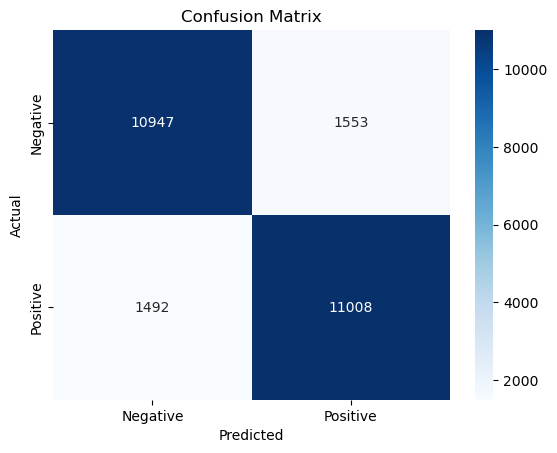

In [13]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(test_labels, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 8. Conclusion and Further Steps

Congratulations! You've completed a basic NLP tutorial using IMDb movie reviews. To enhance your skills, try more advanced techniques, explore different models, and consider working with larger datasets. Additionally, delve into advanced NLP tasks like named entity recognition, text summarization, and machine translation. Keep learning and experimenting!